In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import random
import time
import PySimpleGUI as sg

## Движущийся круг

In [3]:
img = cv.imread('sem_img.jpg')#[:,:,::-1]
img.shape, img.dtype

((1365, 2048, 3), dtype('uint8'))

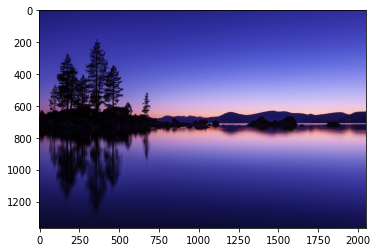

In [4]:
plt.imshow( img[:,:,::-1] );

In [10]:
#возвращает "код" клавиши с клавиатуры
cv.imshow( "Window", img )
print(cv.waitKey(0))
cv.destroyWindow("Window")

- w - 119
- a - 97
- d - 100
- s - 115

- q - 113

In [9]:
class UserData:
    def __call__(self, val):
        self.img_tmp = self.img.copy()+0.
        k = (val-10)/20
        print(val, k)
        self.img_tmp *= 1+k

In [10]:
img = cv.imread('sem_img.jpg')
user = UserData()
user.img_tmp = img.copy()+0
user.img = img

In [11]:
x,y = 700, 400
n, m, t = 255, 145, 123
k = 0

img = cv.imread('sem_img.jpg')#[:,:,::-1]

while k != 113:#q for exit
    cv.imshow( "Window3", img )
    img = cv.imread('sem_img.jpg')#[:,:,::-1]
    cv.circle(img, center = (x, y), radius = 50, color =(n, m, t), thickness=10)
    k = cv.waitKey(10)
    #change colour
    if k == 119: #w
        n += 20
    
    elif k == 97: #a
        n -= 20

    if k == 101: #e 
        m += 20

    elif k == 115: #s
        m -= 20

    if k == 114: #r
        t += 20
    
    elif k == 100: #d
        t -= 20

    #position of center
    if k == 59: # ; up
        y += 100
    elif k == 112: #p down
        y -= 100

    if k == 108: #l left
        x -= 100
    
    elif k == 39: # ' right
        x += 100

cv.destroyWindow("Window3")


## Игра

In [2]:
class UserData:
    def __call__(self, val):
        self.img_tmp = self.img.copy()+0.
        k = (val-10)/20
        print(val, k)
        self.img_tmp *= 1+k

In [3]:
img = cv.imread('sem_img.jpg')
user = UserData()
user.img_tmp = img.copy()+0
user.img = img

In [4]:
w, h = sg.Window.get_screen_size()
w, h

(1536, 864)

In [5]:
img.shape, img.dtype

((1365, 2048, 3), dtype('uint8'))

In [6]:
def collision_with_apple(apple_position, score):
    """
    if snake find apple that score increase and finc create new apple.
    Function return position of apple (x, y), score (int)
    """
    apple_position = [random.randrange(1,w//20)*20,random.randrange(1,h//20)*20]
    score += 1
    return apple_position, score

def collision_with_boundaries(snake_head):
    """
    If snake find boundaries of screen that snake dead.
    Function return int.
    """
    if snake_head[0]>=w or snake_head[0]<0 or snake_head[1]>=h or snake_head[1]<0 :
        return 1
    else:
        return 0

def collision_with_self(snake_position):
    """
    If the snake crashes into itself that snake dead.
    Function return int.
    """
    snake_head = snake_position[0]
    if snake_head in snake_position[1:]:
        return 1
    else:
        return 0

In [7]:
# Displaying the snake
snake_position = [[700,400],[690,400],[690,400]]
for position in snake_position:
        print(position[0],position[1])
        #cv.circle(img,(position[0],position[1]), radius = 10, color =(39, 169, 176), thickness=-1)

700 400
690 400
690 400


In [21]:
k = 0

img = cv.imread('sem_img.jpg')#[:,:,::-1]

# Initial Snake and Apple position
snake_position = [[700,400],[690,400],[680,400]]
apple_position = [random.randrange(1, w//20)*20,random.randrange(1, h//20)*20]
score = 0
prev_button_direction = 1
button_direction = 1
snake_head = [700,400]


while k != 113:#q for exit
    cv.imshow( "Window3", img )
    cv.waitKey(1)

    img = cv.imread('sem_img.jpg')#[:,:,::-1]
    
    # Display Apple
    cv.circle(img,(apple_position[0],apple_position[1]), radius = 20, color =(42, 42, 156), thickness=-1)
    
    # Displaying the snake
    
    for position in snake_position:
        cv.circle(img,(position[0],position[1]), radius = 20, color =(176, 169, 39), thickness=-1)
    # Takes step after fixed time
    t_end = time.time() + 0.005
    k = -1
    while time.time() < t_end:
        if k == -1:
            k = cv.waitKey(125)
        else:
            continue
    
    # a-Left, d-Right, w-Up, s-Down

    if k == ord('a') and prev_button_direction != 1:
        button_direction = 0
    elif k == ord('d') and prev_button_direction != 0:
        button_direction = 1
    elif k == ord('w') and prev_button_direction != 2:
        button_direction = 3
    elif k == ord('s') and prev_button_direction != 3:
        button_direction = 2
    elif k == ord('q'):
        break
    else:
        button_direction = button_direction
    prev_button_direction = button_direction
    
    # Change the head position based on the button direction
    if button_direction == 1:
        snake_head[0] += 20
    elif button_direction == 0:
        snake_head[0] -= 20
    elif button_direction == 2:
        snake_head[1] += 20
    elif button_direction == 3:
        snake_head[1] -= 20

    # Increase Snake length on eating apple
    if snake_head == apple_position:
        apple_position, score = collision_with_apple(apple_position, score)
        snake_position.insert(0,list(snake_head))

    else:
        snake_position.insert(0,list(snake_head))
        snake_position.pop()
     
    # On collision kill the snake and print the score
    if collision_with_boundaries(snake_head) == 1 or collision_with_self(snake_position) == 1:
        font = cv.FONT_HERSHEY_SIMPLEX
        img = np.zeros((500,500,3),dtype='uint8')
        cv.putText(img,'Your Score is {}'.format(score),(140,250), font, 1,(255,255,255),2,cv.LINE_AA)
        cv.imshow('a',img)
        cv.waitKey(0)
        break

cv.destroyWindow("Window3")